In [1]:
# 구글 클라우드 연결
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# 시각화 한글폰트 설정

# 나눔글꼴 설치
!apt-get install -y fonts-nanum > /dev/null
# matplotlib 폰트 캐시 갱신
import matplotlib
import matplotlib.font_manager as fm
import os

# 캐시 폴더 삭제 → 자동 재생성 유도
os.system("rm -rf " + matplotlib.get_cachedir())

# 시각화 설정
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#경고 무시
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumGothic')
sns.set(font="NanumGothic",
        rc={"axes.unicode_minus": False},
        style='darkgrid')

In [ ]:
# 필요한 모듈 import
import sys
import pandas as pd
import scipy.stats as spst
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

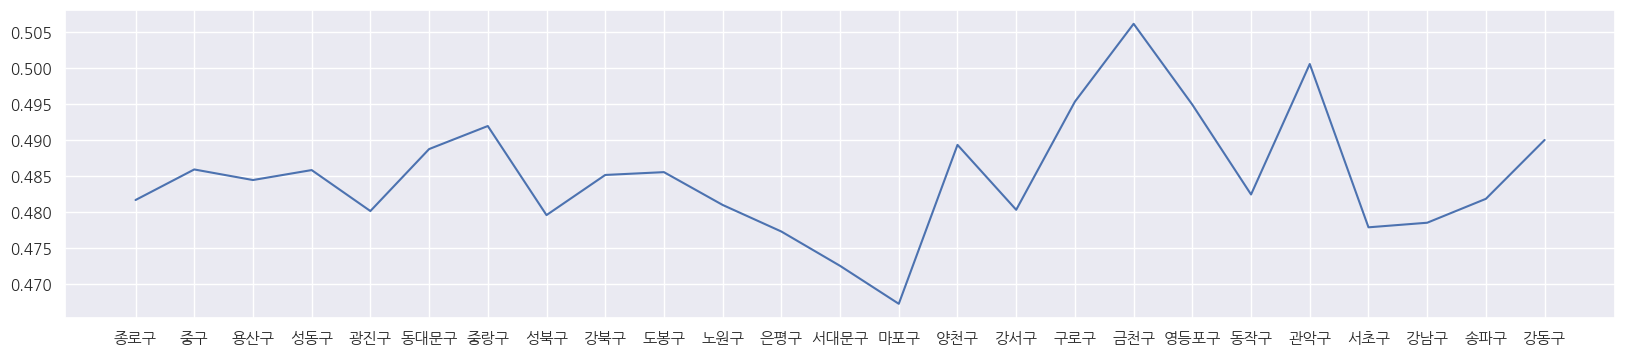

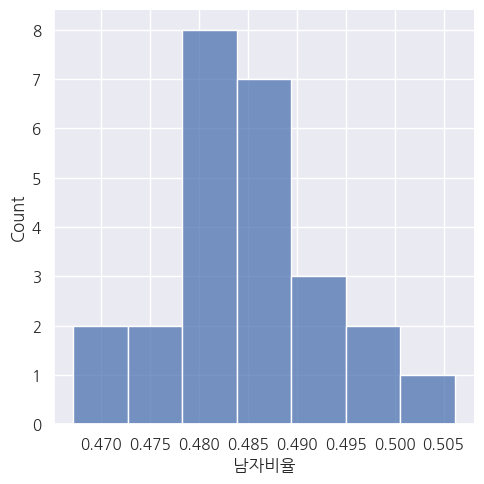

In [ ]:
#0(3)번 파일 과정1
seoul_people = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI+X_second_project/rawdata/1.3 seoul_people.csv', sep="\t", encoding = "cp949", header = 2)
seoul_people_1 = seoul_people[['기간','자치구','남자','여자','계']]
seoul_people_1 = seoul_people_1.drop(0)

# 교수님이 시각화 하신 것
seoul_people_1["남자비율"] = seoul_people_1['남자'] / seoul_people_1["계"]
plt.figure(figsize=(20,4))
plt.plot('자치구', '남자비율', data = seoul_people_1)
plt.show()
sns.displot(seoul_people_1['남자비율'])
plt.show()
spst.pearsonr(seoul_people_1['남자'],seoul_people_1['계'])
seoul_people_2 = seoul_people_1[['남자','여자','계','남자비율']]
seoul_people_2.corr()

#내가 한 것: 필요한 부분만 전처리 후 파일로 저장
seoul_people_3 = seoul_people[[ #'기간', 기간이 필요 없다고 생각한다.
                               '자치구', '계', '계.1', '계.2', '세대당인구', '65세이상고령자']].rename(
    columns={
        '계': '전체인구수',
        '계.1': '한국인인구수',
        '계.2': '등록외국인인구수'
    }
)

seoul_people_3.to_csv("/content/drive/MyDrive/Colab Notebooks/AI+X_second_project/rawdata/seoul_people_processing.csv", index = False)


In [ ]:
# 0(3)번 파일, seoul_people 형태
seoul_people=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI+X_second_project/rawdata/seoul_people_processing.csv", sep=",", encoding = "utf-8")
display(seoul_people.info())
display(seoul_people.head())
display(seoul_people.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구       26 non-null     object 
 1   전체인구수     26 non-null     int64  
 2   한국인인구수    26 non-null     int64  
 3   등록외국인인구수  26 non-null     int64  
 4   세대당인구     26 non-null     float64
 5   65세이상고령자  26 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.3+ KB


None

,자치구,전체인구수,한국인인구수,등록외국인인구수,세대당인구,65세이상고령자
0,합계,9732617,9506778,225839,2.14,1628980
1,종로구,153684,144275,9409,1.96,28064
2,중구,131450,122173,9277,1.92,24742
3,용산구,236518,222169,14349,2.00,39461
4,성동구,291609,285073,6536,2.12,46896


,전체인구수,한국인인구수,등록외국인인구수,세대당인구,65세이상고령자
count,2.600000e+01,2.600000e+01,26.000000,26.000000,2.600000e+01
mean,7.486628e+05,7.312906e+05,17372.230769,2.122308,1.253062e+05
std,1.836534e+06,1.794212e+06,42916.522946,0.164859,3.072717e+05
min,1.314500e+05,1.221730e+05,2002.000000,1.740000,2.474200e+04
25%,3.173312e+05,3.084240e+05,4108.500000,2.002500,5.505100e+04
50%,3.974450e+05,3.875300e+05,8954.500000,2.105000,6.629600e+04
75%,4.732840e+05,4.695192e+05,13453.000000,2.252500,7.861100e+04
max,9.732617e+06,9.506778e+06,225839.000000,2.450000,1.628980e+06


In [ ]:
# 1번 파일, seoul_bus_station 형태
seoul_bus_station=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI+X_second_project/rawdata/seoul_bus_station_processing.csv", sep=",", encoding = "utf-8")
display(seoul_bus_station.info())
display(seoul_bus_station.head())
display(seoul_bus_station.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구      25 non-null     object 
 1   정류장수     25 non-null     int64  
 2   노선수      25 non-null     int64  
 3   승차총승객수   25 non-null     int64  
 4   하차총승객수   25 non-null     int64  
 5   승차평균승객수  25 non-null     float64
 6   하차평균승객수  25 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.5+ KB


None

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
count,25.000000,25.000000,2.500000e+01,2.500000e+01,25.000000,25.000000
mean,424.600000,72.920000,4.912037e+06,4.800701e+06,115.718291,113.031529
std,106.279506,23.808122,1.421263e+06,1.400538e+06,17.080840,16.865744
min,178.000000,21.000000,2.749448e+06,2.746738e+06,87.403863,86.214261
25%,349.000000,56.000000,3.792541e+06,3.740923e+06,103.907639,101.235343
50%,435.000000,71.000000,4.942197e+06,4.730992e+06,119.235615,115.324511
75%,499.000000,94.000000,5.641742e+06,5.603488e+06,126.687777,122.418028
max,602.000000,107.000000,8.030483e+06,7.792476e+06,154.753674,157.516040


In [ ]:
# 0번, 1번 파일 병합
seoul_people_bus_station= pd.merge(seoul_people,seoul_bus_station,how='inner', on='자치구')
display(seoul_people_bus_station.info())
display(seoul_people_bus_station.head())
display(seoul_people_bus_station.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구       25 non-null     object 
 1   전체인구수     25 non-null     int64  
 2   한국인인구수    25 non-null     int64  
 3   등록외국인인구수  25 non-null     int64  
 4   세대당인구     25 non-null     float64
 5   65세이상고령자  25 non-null     int64  
 6   정류장수      25 non-null     int64  
 7   노선수       25 non-null     int64  
 8   승차총승객수    25 non-null     int64  
 9   하차총승객수    25 non-null     int64  
 10  승차평균승객수   25 non-null     float64
 11  하차평균승객수   25 non-null     float64
dtypes: float64(3), int64(8), object(1)
memory usage: 2.5+ KB


None

,자치구,전체인구수,한국인인구수,등록외국인인구수,세대당인구,65세이상고령자,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,종로구,153684,144275,9409,1.96,28064,349,106,5468935,5205394,131.889620,125.534028
1,중구,131450,122173,9277,1.92,24742,178,103,3776675,3598932,121.020124,115.324511
2,용산구,236518,222169,14349,2.00,39461,323,67,4189977,4086474,137.891694,134.485421
3,성동구,291609,285073,6536,2.12,46896,435,58,2807280,2746738,96.377369,94.298888
4,광진구,353110,340707,12403,2.01,52604,269,41,2749448,2753411,118.352546,118.523137


,전체인구수,한국인인구수,등록외국인인구수,세대당인구,65세이상고령자,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01,2.500000e+01,25.000000,25.000000
mean,389304.680000,380271.120000,9033.560000,2.121600,65159.200000,424.600000,72.920000,4.912037e+06,4.800701e+06,115.718291,113.031529
std,126085.700172,127530.962012,5947.579746,0.168218,19280.183408,106.279506,23.808122,1.421263e+06,1.400538e+06,17.080840,16.865744
min,131450.000000,122173.000000,2002.000000,1.740000,24742.000000,178.000000,21.000000,2.749448e+06,2.746738e+06,87.403863,86.214261
25%,317075.000000,305866.000000,3959.000000,2.000000,55012.000000,349.000000,56.000000,3.792541e+06,3.740923e+06,103.907639,101.235343
50%,394649.000000,386017.000000,8632.000000,2.100000,65122.000000,435.000000,71.000000,4.942197e+06,4.730992e+06,119.235615,115.324511
75%,465097.000000,461300.000000,12403.000000,2.270000,75719.000000,499.000000,94.000000,5.641742e+06,5.603488e+06,126.687777,122.418028
max,668261.000000,662607.000000,23967.000000,2.450000,99854.000000,602.000000,107.000000,8.030483e+06,7.792476e+06,154.753674,157.516040


In [ ]:
#2번 파일, seoul_moving 형태
seoul_moving=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI+X_second_project/rawdata/seoul_grouped_day_clean.csv',sep=",", index_col = 0, encoding = 'UTF-8')
seoul_moving=seoul_moving.reset_index(drop=True)
seoul_moving.info()
seoul_moving=seoul_moving[['도착 자치구', '평균 이동 시간(분)', '이동인구_평균']]
display(seoul_moving.info())
display(seoul_moving.head())
display(seoul_moving.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50399 entries, 0 to 50398
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별           50399 non-null  object 
 1   나이           50399 non-null  int64  
 2   이동유형         50399 non-null  object 
 3   평균 이동 시간(분)  50399 non-null  float64
 4   이동인구_평균      50399 non-null  float64
 5   이동인구_합       50399 non-null  float64
 6   도착 자치구       50399 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50399 entries, 0 to 50398
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   도착 자치구       50399 non-null  object 
 1   평균 이동 시간(분)  50399 non-null  float64
 2   이동인구_평균      50399 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.2+ MB


None

,도착 자치구,평균 이동 시간(분),이동인구_평균
0,종로구,10.10989,75.553187
1,종로구,10.00000,78.029630
2,종로구,10.00000,36.886667
3,종로구,10.40404,54.507071
4,종로구,10.00000,76.566667


,평균 이동 시간(분),이동인구_평균
count,50399.000000,50399.000000
mean,20.055683,52.845391
std,6.288657,50.058196
min,10.000000,5.983425
25%,15.000000,25.059415
50%,20.365854,39.610299
75%,24.558787,62.137416
max,41.800000,736.896111


In [ ]:
# '도착 자치구'를 기준으로 그룹화하고 숫자형 열에 대한 평균 계산
seoul_moving_grouped_by_arrival = seoul_moving.groupby('도착 자치구').mean(numeric_only=True)

# 결과 확인
display(seoul_moving_grouped_by_arrival.head())

,평균 이동 시간(분),이동인구_평균
도착 자치구,,
강남구,20.515845,89.556709
강동구,22.040385,80.496167
강북구,20.559909,42.528412
강서구,21.494418,66.548605
관악구,20.201884,50.271343


In [ ]:
#4번 파일, seoul_business 형태
seoul_business=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI+X_second_project/rawdata/seoul_business_processing.csv',sep=",", index_col = 0, encoding = 'UTF-8')
display(seoul_business.info())
display(seoul_business.head())
display(seoul_business.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 강남구 to 합계
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   택시운송업_사업체수            26 non-null     float64
 1   택시운송업_종사자수            26 non-null     float64
 2   한식 일반 음식점업_사업체수       26 non-null     int64  
 3   한식 일반 음식점업_종사자수       26 non-null     int64  
 4   용달 화물자동차 운송업_사업체수     26 non-null     float64
 5   용달 화물자동차 운송업_종사자수     26 non-null     float64
 6   부동산 중개 및 대리업_사업체수     26 non-null     int64  
 7   부동산 중개 및 대리업_종사자수     26 non-null     int64  
 8   두발미용업_사업체수            26 non-null     float64
 9   두발미용업_종사자수            26 non-null     float64
 10  커피전문점_사업체수            26 non-null     int64  
 11  커피전문점_종사자수            26 non-null     int64  
 12  남녀용 겉옷 및 셔츠 도매업_사업체수  26 non-null     float64
 13  남녀용 겉옷 및 셔츠 도매업_종사자수  26 non-null     float64
 14  기타주점업_사업체수            26 non-null     float64
 15  기타주점업_종사자수            26 non

None

,택시운송업_사업체수,택시운송업_종사자수,한식 일반 음식점업_사업체수,한식 일반 음식점업_종사자수,용달 화물자동차 운송업_사업체수,용달 화물자동차 운송업_종사자수,부동산 중개 및 대리업_사업체수,부동산 중개 및 대리업_종사자수,두발미용업_사업체수,두발미용업_종사자수,커피전문점_사업체수,커피전문점_종사자수,남녀용 겉옷 및 셔츠 도매업_사업체수,남녀용 겉옷 및 셔츠 도매업_종사자수,기타주점업_사업체수,기타주점업_종사자수,일반 교과 학원_사업체수,일반 교과 학원_종사자수,한식 육류요리 전문점_사업체수,한식 육류요리 전문점_종사자수
자치구,,,,,,,,,,,,,,,,,,,,
강남구,3592.0,5034.0,4830,22972,890.0,974.0,4674,13016,2482.0,12510.0,3248,14546,768.0,16640.0,1426.0,5056.0,2852.0,18040.0,1654.0,10016.0
강동구,6590.0,9960.0,2202,6776,3056.0,3132.0,2376,3980,1800.0,2858.0,1092,3320,118.0,2866.0,1178.0,2698.0,1240.0,4208.0,856.0,2918.0
강북구,3426.0,5178.0,1930,5326,2048.0,2060.0,1178,1734,1346.0,1994.0,716,2190,80.0,188.0,1160.0,2550.0,440.0,1480.0,724.0,2352.0
강서구,7470.0,13844.0,2650,9168,3598.0,3724.0,2622,4704,2030.0,3502.0,1380,5060,156.0,1400.0,1588.0,3418.0,1344.0,4694.0,1162.0,4548.0
관악구,2572.0,4054.0,2452,7378,3158.0,3200.0,2020,4272,1790.0,3208.0,1162,4098,62.0,380.0,1316.0,3344.0,708.0,2460.0,844.0,3256.0


,택시운송업_사업체수,택시운송업_종사자수,한식 일반 음식점업_사업체수,한식 일반 음식점업_종사자수,용달 화물자동차 운송업_사업체수,용달 화물자동차 운송업_종사자수,부동산 중개 및 대리업_사업체수,부동산 중개 및 대리업_종사자수,두발미용업_사업체수,두발미용업_종사자수,커피전문점_사업체수,커피전문점_종사자수,남녀용 겉옷 및 셔츠 도매업_사업체수,남녀용 겉옷 및 셔츠 도매업_종사자수,기타주점업_사업체수,기타주점업_종사자수,일반 교과 학원_사업체수,일반 교과 학원_종사자수,한식 육류요리 전문점_사업체수,한식 육류요리 전문점_종사자수
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,5443.384615,8850.115385,3372.115385,11559.576923,3287.769231,3387.230769,2770.730769,4919.538462,2086.153846,4178.538462,1875.576923,6614.076923,1544.769231,5898.000000,1539.115385,3619.730769,1374.346154,5858.423077,1281.807692,5152.269231
std,8805.522081,14363.670685,5330.422830,18552.557258,5226.091291,5380.371528,4405.068513,8023.398987,3294.865044,6874.684541,3002.850488,10727.133499,4844.474926,13344.891985,2427.607288,5745.086928,2250.834635,9927.856591,2020.718368,8228.875411
min,430.000000,430.000000,1344.000000,4018.000000,600.000000,666.000000,1030.000000,1588.000000,522.000000,960.000000,576.000000,1674.000000,40.000000,86.000000,516.000000,954.000000,114.000000,350.000000,562.000000,1886.000000
25%,2261.000000,3770.500000,1741.000000,5341.500000,1618.000000,1665.500000,1440.000000,2315.500000,1205.500000,1835.000000,860.000000,2754.500000,66.500000,384.500000,881.500000,1923.500000,576.000000,2108.500000,725.500000,2443.000000
50%,3460.000000,5187.000000,2039.000000,6202.000000,2567.000000,2628.000000,1717.000000,2745.000000,1468.000000,2506.000000,1093.000000,3607.000000,163.000000,1623.000000,1047.000000,2420.000000,768.000000,2957.000000,865.000000,3102.000000
75%,5868.000000,9838.000000,3027.500000,10992.500000,3120.500000,3144.000000,2290.500000,3936.500000,1791.500000,3127.500000,1722.500000,6705.500000,310.000000,3061.000000,1263.500000,2968.000000,1318.000000,4572.500000,979.000000,4287.000000
max,47176.000000,76701.000000,29225.000000,100183.000000,28494.000000,29356.000000,24013.000000,42636.000000,18080.000000,36214.000000,16255.000000,57322.000000,21620.000000,51116.000000,13339.000000,31371.000000,11911.000000,50773.000000,11109.000000,44653.000000


In [ ]:
#main data
display(seoul_people_bus_station)
display(seoul_moving_grouped_by_arrival)

# sub data
#display(seoul_business)


,자치구,전체인구수,한국인인구수,등록외국인인구수,세대당인구,65세이상고령자,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,종로구,153684,144275,9409,1.96,28064,349,106,5468935,5205394,131.889620,125.534028
1,중구,131450,122173,9277,1.92,24742,178,103,3776675,3598932,121.020124,115.324511
2,용산구,236518,222169,14349,2.00,39461,323,67,4189977,4086474,137.891694,134.485421
3,성동구,291609,285073,6536,2.12,46896,435,58,2807280,2746738,96.377369,94.298888
4,광진구,353110,340707,12403,2.01,52604,269,41,2749448,2753411,118.352546,118.523137
5,동대문구,352592,337982,14610,1.99,62963,306,73,5240565,5115379,131.841430,128.692017
6,중랑구,393600,389043,4557,2.07,72851,380,48,3792541,3740923,87.403863,86.214261
7,성북구,442680,433150,9530,2.20,75719,602,99,6236424,6231238,123.251922,123.149430
8,강북구,300824,297384,3440,2.05,64961,413,67,4825181,4671783,133.020373,128.791504
9,도봉구,318100,316098,2002,2.28,65122,359,46,3304305,3211421,106.859356,103.855540


,평균 이동 시간(분),이동인구_평균
도착 자치구,,
강남구,20.515845,89.556709
강동구,22.040385,80.496167
강북구,20.559909,42.528412
강서구,21.494418,66.548605
관악구,20.201884,50.271343
광진구,19.632367,50.053934
구로구,19.870792,44.932557
금천구,20.244677,32.141203
노원구,20.978474,59.100906


In [ ]:
# seoul_people_bus_station와 seoul_moving_grouped_by_arrival 데이터프레임 병합
main_data_1 = pd.merge(
    seoul_people_bus_station,
    seoul_moving_grouped_by_arrival,
    left_on='자치구',  # seoul_people_bus_station의 '자치구' 컬럼 사용
    right_index=True,  # seoul_moving_grouped_by_arrival의 인덱스 사용
    how='inner'        # 공통된 자치구만 포함
)

# 결과 확인
display(main_data_1.head())

,자치구,전체인구수,한국인인구수,등록외국인인구수,세대당인구,65세이상고령자,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구_평균
0,종로구,153684,144275,9409,1.96,28064,349,106,5468935,5205394,131.889620,125.534028,18.924306,39.694742
1,중구,131450,122173,9277,1.92,24742,178,103,3776675,3598932,121.020124,115.324511,18.648665,39.266551
2,용산구,236518,222169,14349,2.00,39461,323,67,4189977,4086474,137.891694,134.485421,18.849667,36.098100
3,성동구,291609,285073,6536,2.12,46896,435,58,2807280,2746738,96.377369,94.298888,19.070904,44.649255
4,광진구,353110,340707,12403,2.01,52604,269,41,2749448,2753411,118.352546,118.523137,19.632367,50.053934


                전체인구수    한국인인구수  등록외국인인구수     세대당인구  65세이상고령자      정류장수  \
전체인구수        1.000000  0.998965 -0.220807  0.481283  0.951353  0.566615   
한국인인구수       0.998965  1.000000 -0.264941  0.500851  0.953338  0.563648   
등록외국인인구수    -0.220807 -0.264941  1.000000 -0.536552 -0.273735 -0.074076   
세대당인구        0.481283  0.500851 -0.536552  1.000000  0.465062  0.315087   
65세이상고령자     0.951353  0.953338 -0.273735  0.465062  1.000000  0.554425   
정류장수         0.566615  0.563648 -0.074076  0.315087  0.554425  1.000000   
노선수         -0.281536 -0.295912  0.376667 -0.295018 -0.334297  0.258798   
승차총승객수       0.364433  0.354262  0.129526 -0.015831  0.295889  0.566681   
하차총승객수       0.388119  0.376908  0.146077 -0.039725  0.322254  0.578479   
승차평균승객수     -0.269854 -0.287016  0.433584 -0.503971 -0.306123 -0.135318   
하차평균승객수     -0.207643 -0.226520  0.455231 -0.531749 -0.243298 -0.099146   
평균 이동 시간(분)  0.705511  0.721893 -0.522712  0.482230  0.767778  0.265092   
이동인구_평균      0.795627  0.

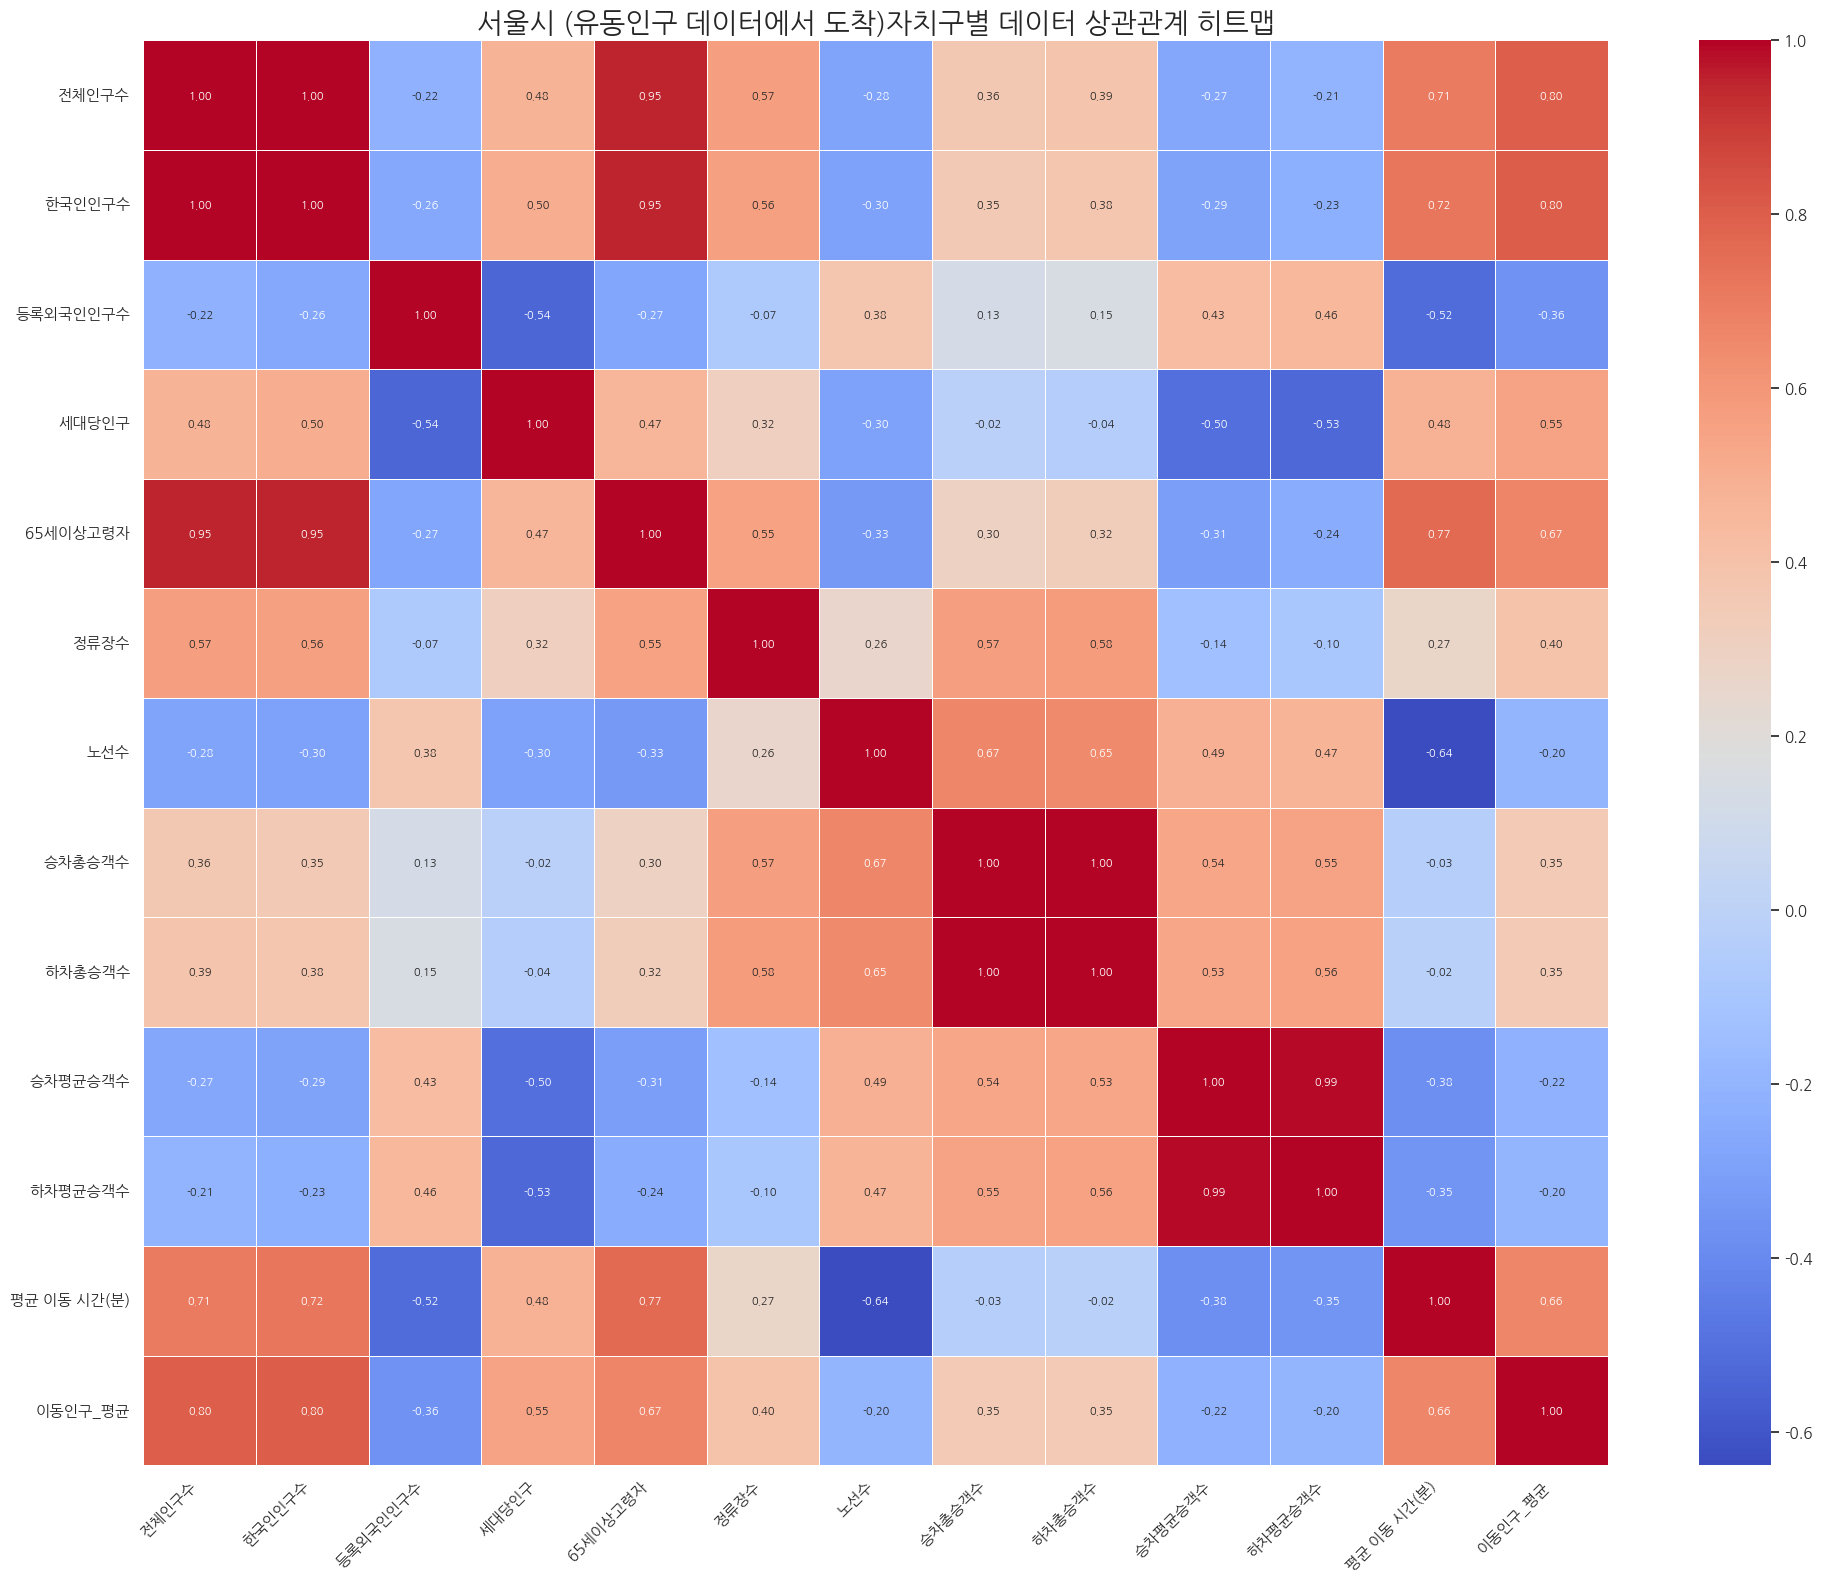

In [ ]:
# (유동인구 데이터에서 도착)자치구 기준 데이터 사용, '자치구 제외 숫자만 계산
correlation_matrix = main_data_1.corr(numeric_only=True)

# 결과 확인
print(correlation_matrix)

plt.figure(figsize=(20, 16))
sns.heatmap(
    correlation_matrix,  # 사용할 상관관계 데이터
    annot=True,          # 각 셀에 숫자(상관계수) 표시
    fmt='.2f',           # 숫자는 소수점 둘째 자리까지 표시
    cmap='coolwarm',     # 색상 맵 (양수는 붉은 계열, 음수는 푸른 계열)
    linewidths=.5,       # 셀 사이에 얇은 선 추가
    annot_kws={"size": 8} # 숫자 글자 크기 조절
)
plt.title('서울시 (유동인구 데이터에서 도착)자치구별 데이터 상관관계 히트맵', fontsize=20)
plt.xticks(rotation=45, ha='right') # x축 라벨 겹침 방지
plt.tight_layout() # 그래프 자동 맞춤
plt.savefig('/content/drive/MyDrive/Colab Notebooks/AI+X_second_project/rawdata/seoul_data_correlation_heatmap_1.png')

In [ ]:
seoul_people_bus_station.head()

,자치구,전체인구수,한국인인구수,등록외국인인구수,세대당인구,65세이상고령자,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,종로구,153684,144275,9409,1.96,28064,349,106,5468935,5205394,131.889620,125.534028
1,중구,131450,122173,9277,1.92,24742,178,103,3776675,3598932,121.020124,115.324511
2,용산구,236518,222169,14349,2.00,39461,323,67,4189977,4086474,137.891694,134.485421
3,성동구,291609,285073,6536,2.12,46896,435,58,2807280,2746738,96.377369,94.298888
4,광진구,353110,340707,12403,2.01,52604,269,41,2749448,2753411,118.352546,118.523137


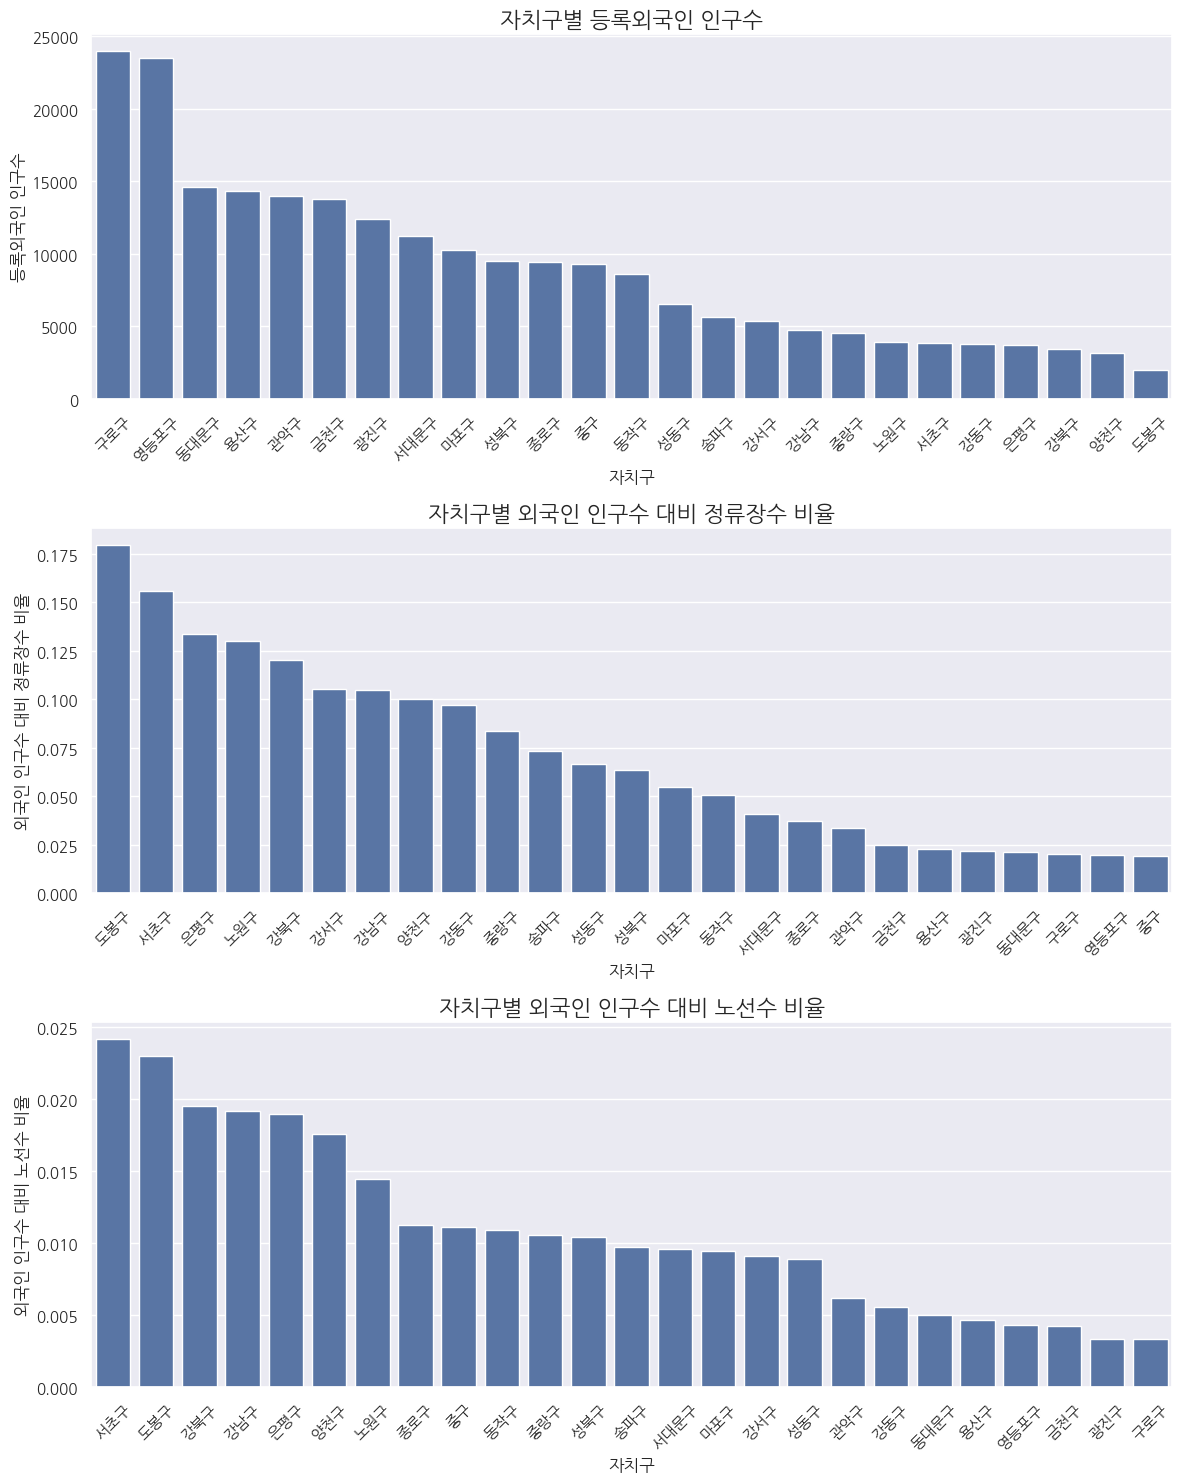

In [ ]:
# 8. 가설: 버스 시설이 증가하면 등록외국인들이 편리할 것이다. (선역님)
# 제언: 등록외국인 인구가 많은 지역에 버스 시설을 추가한다.

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

# 그래프1: 자치구별 등록외국인 인구수
seoul_people_bus_station_sorted = seoul_people_bus_station.sort_values(by='등록외국인인구수', ascending=False)

sns.barplot(x='자치구', y='등록외국인인구수', data=seoul_people_bus_station_sorted, ax=axes[0])
axes[0].set_title('자치구별 등록외국인 인구수', fontsize=16)
axes[0].set_xlabel('자치구', fontsize=12)
axes[0].set_ylabel('등록외국인 인구수', fontsize=12)
axes[0].tick_params(axis='x', rotation=45) # x축 라벨 회전

# 그래프2: 외국인 인구수 대비 정류장수 비율
seoul_people_bus_station['외국인인구수_대비_정류장수_비율'] = seoul_people_bus_station['정류장수'] / seoul_people_bus_station['등록외국인인구수']
seoul_people_bus_station_sorted_station_ratio = seoul_people_bus_station.sort_values(by='외국인인구수_대비_정류장수_비율', ascending=False)
sns.barplot(x='자치구', y='외국인인구수_대비_정류장수_비율', data=seoul_people_bus_station_sorted_station_ratio, ax=axes[1])
axes[1].set_title('자치구별 외국인 인구수 대비 정류장수 비율', fontsize=16)
axes[1].set_xlabel('자치구', fontsize=12)
axes[1].set_ylabel('외국인 인구수 대비 정류장수 비율', fontsize=12)
axes[1].tick_params(axis='x', rotation=45) # x축 라벨 회전

# 그래프3: 외국인 인구수 대비 노선수 비율
seoul_people_bus_station['외국인인구수_대비_노선수_비율'] = seoul_people_bus_station['노선수'] / seoul_people_bus_station['등록외국인인구수']
seoul_people_bus_station_sorted_route_ratio = seoul_people_bus_station.sort_values(by='외국인인구수_대비_노선수_비율', ascending=False)
sns.barplot(x='자치구', y='외국인인구수_대비_노선수_비율', data=seoul_people_bus_station_sorted_route_ratio, ax=axes[2])
axes[2].set_title('자치구별 외국인 인구수 대비 노선수 비율', fontsize=16)
axes[2].set_xlabel('자치구', fontsize=12)
axes[2].set_ylabel('외국인 인구수 대비 노선수 비율', fontsize=12)
axes[2].tick_params(axis='x', rotation=45) # x축 라벨 회전

plt.tight_layout()
plt.show()

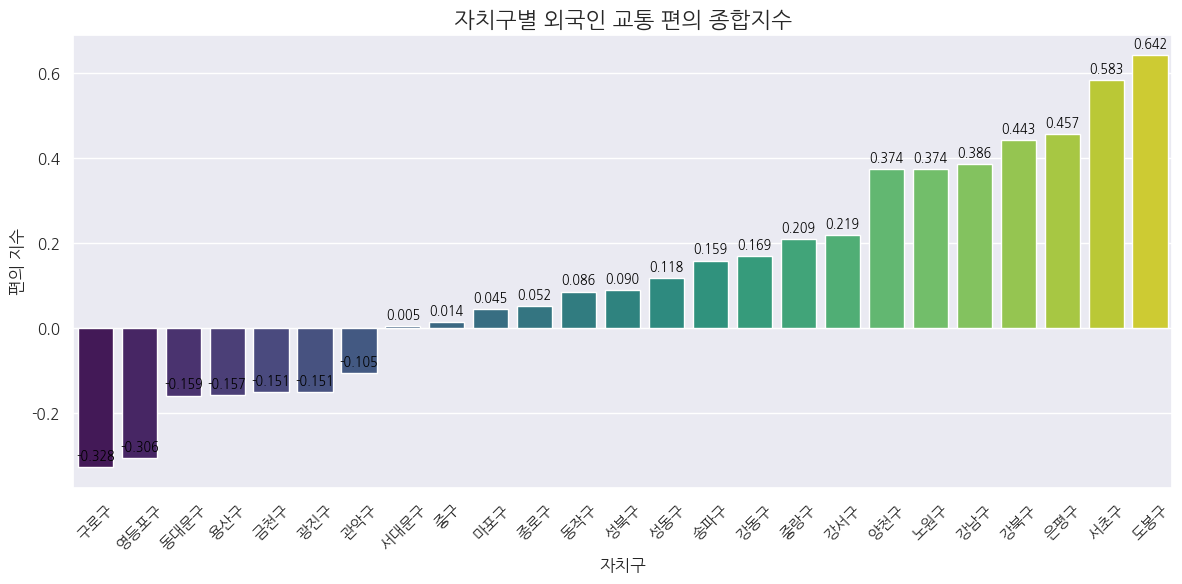

In [ ]:
# 8번 이어서
df = seoul_people_bus_station.copy()

# 비율 계산
df['외국인인구수_대비_정류장수_비율'] = df['정류장수'] / df['등록외국인인구수']
df['외국인인구수_대비_노선수_비율'] = df['노선수'] / df['등록외국인인구수']

# 정규화 (0~1)
for col in ['등록외국인인구수', '외국인인구수_대비_정류장수_비율', '외국인인구수_대비_노선수_비율']:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col + '_norm'] = (df[col] - min_val) / (max_val - min_val)

# ✅ 가중치
w_foreign = -0.33   # 등록외국인 인구수
w_station = 0.33   # 외국인 대비 정류장수
w_route   = 0.33  # 외국인 대비 노선수

# 가중합 계산
df['외국인_편의_지수'] = (
    df['등록외국인인구수_norm'] * w_foreign +
    df['외국인인구수_대비_정류장수_비율_norm'] * w_station +
    df['외국인인구수_대비_노선수_비율_norm'] * w_route
)

# 정렬
df_sorted = df.sort_values(by='외국인_편의_지수', ascending=True)

# 시각화
plt.figure(figsize=(12,6))
sns.barplot(x='자치구', y='외국인_편의_지수', data=df_sorted, palette='viridis')

# 값 표기 (막대 위에 표시)
for i, v in enumerate(df_sorted['외국인_편의_지수']):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=9, color='black')

# 제목 / 축 설정
plt.title('자치구별 외국인 교통 편의 종합지수', fontsize=16)
plt.xlabel('자치구', fontsize=12)
plt.ylabel('편의 지수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


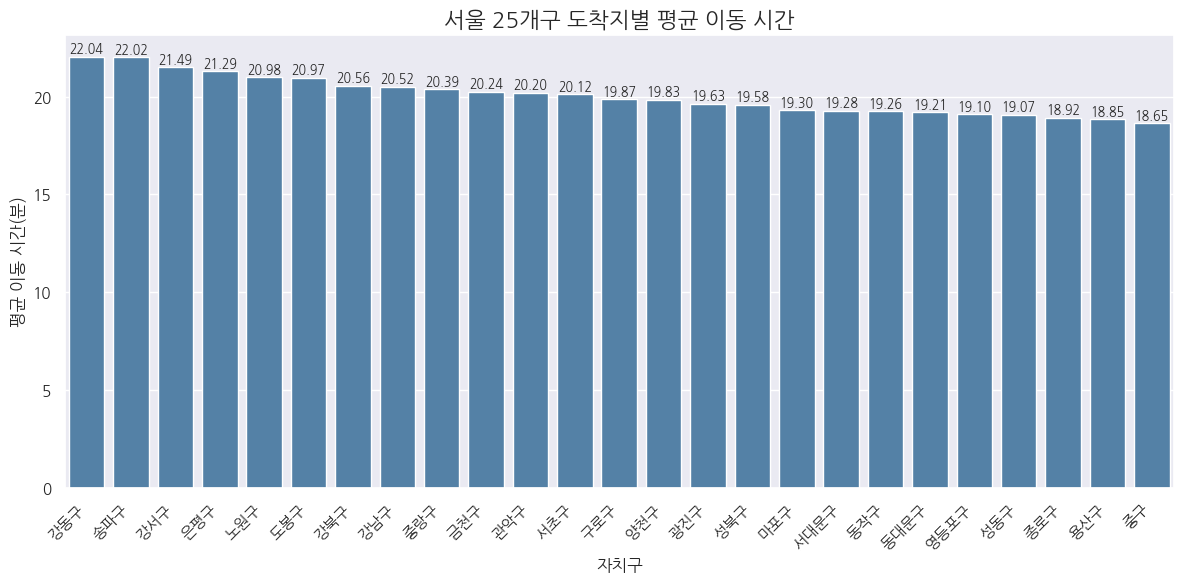

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 평균 이동 시간 기준으로 정렬 (내림차순: 큰 값 → 작은 값)
main_data_sorted = main_data_1.sort_values(by='평균 이동 시간(분)', ascending=False)

# 🔹 시각화
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x='자치구',
    y='평균 이동 시간(분)',
    data=main_data_sorted,
    order=main_data_sorted['자치구'],
    color= 'steelblue'
)

plt.title('서울 25개구 도착지별 평균 이동 시간', fontsize=16)
plt.xlabel('자치구', fontsize=12)
plt.ylabel('평균 이동 시간(분)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 🔹 막대 위에 값 표시
for p in barplot.patches:
    barplot.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=9
    )

plt.show()


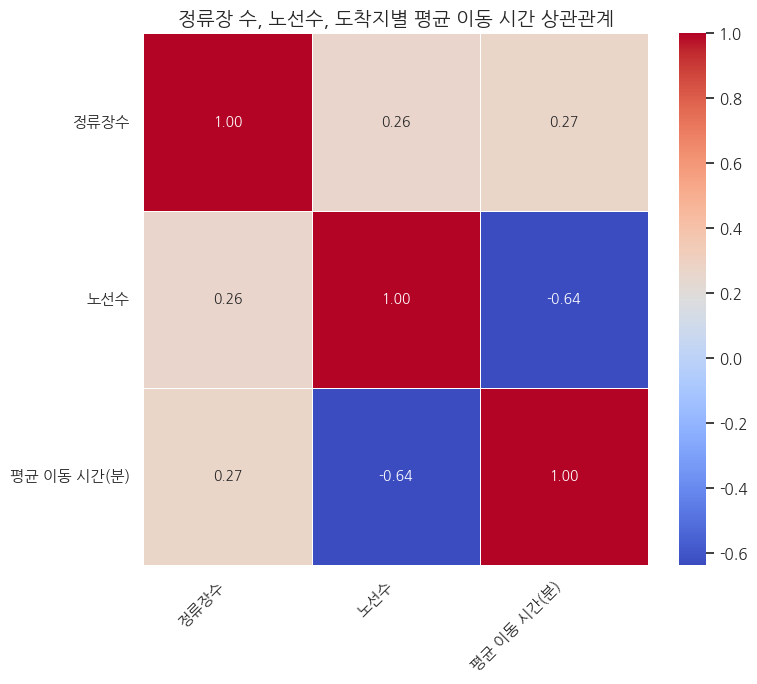

In [ ]:

# 필요한 컬럼만 선택하여 상관관계 계산 ('노선수' 추가)
correlation_data = main_data_1[['정류장수', '노선수', '평균 이동 시간(분)']]
correlation_matrix = correlation_data.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(8, 7))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=.5,
    annot_kws={"size": 10}
)
plt.title('정류장 수, 노선수, 도착지별 평균 이동 시간 상관관계', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as spst

# 상관관계 및 정규성 검정 대상 컬럼
cols_to_correlate = ['정류장수', '노선수', '평균 이동 시간(분)']

print("정규성 검정: Shapiro-Wilk Test)")
for col in cols_to_correlate:
    stat, p = spst.shapiro(correlation_data[col])
    print(f"'{col}'의 Shapiro-Wilk 통계량: {stat:.4f}, p-value: {p:.4f}")
    if p > 0.05:
        print(f"  → 정규분포를 따른다. (p>0.05)\n")
    else:
        print(f"  → 정규분포가 따르지 않는다. (p≤0.05)\n")


정규성 검정: Shapiro-Wilk Test)
'정류장수'의 Shapiro-Wilk 통계량: 0.9804, p-value: 0.8936
  → 정규분포를 따른다. (p>0.05)

'노선수'의 Shapiro-Wilk 통계량: 0.9453, p-value: 0.1963
  → 정규분포를 따른다. (p>0.05)

'평균 이동 시간(분)'의 Shapiro-Wilk 통계량: 0.9410, p-value: 0.1562
  → 정규분포를 따른다. (p>0.05)



In [ ]:
# 필요한 라이브러리 import
import scipy.stats as spst

# 상관관계 계산 대상 컬럼 목록
cols_to_correlate = ['정류장수', '노선수', '평균 이동 시간(분)']

# 각 컬럼 쌍에 대해 피어슨 상관관계와 p-값 계산
for i in range(len(cols_to_correlate)):
    for j in range(i + 1, len(cols_to_correlate)):
        col1 = cols_to_correlate[i]
        col2 = cols_to_correlate[j]

        # 피어슨 상관관계 및 p-값 계산
        correlation, p_value = spst.pearsonr(correlation_data[col1], correlation_data[col2])

        print(f"'{col1}' 와 '{col2}' 의 피어슨 상관관계:")
        print(f"  상관계수 (r): {correlation:.4f}")
        print(f"  p-값: {p_value:.4f}")

        # p-값 기반 통계적 유의성 판단 (일반적으로 유의수준 0.05 사용)
        alpha = 0.05
        if p_value < alpha:
            print(f"  (p-값 < {alpha}: 통계적으로 유의미한 상관관계가 있다.)")
        else:
            print(f"  (p-값 >= {alpha}: 통계적으로 유의미한 상관관계가 없다.)")
        print("-" * 30)

'정류장수' 와 '노선수' 의 피어슨 상관관계:
  상관계수 (r): 0.2588
  p-값: 0.2116
  (p-값 >= 0.05: 통계적으로 유의미한 상관관계가 없다.)
------------------------------
'정류장수' 와 '평균 이동 시간(분)' 의 피어슨 상관관계:
  상관계수 (r): 0.2651
  p-값: 0.2003
  (p-값 >= 0.05: 통계적으로 유의미한 상관관계가 없다.)
------------------------------
'노선수' 와 '평균 이동 시간(분)' 의 피어슨 상관관계:
  상관계수 (r): -0.6383
  p-값: 0.0006
  (p-값 < 0.05: 통계적으로 유의미한 상관관계가 있다.)
------------------------------


In [ ]:
# --- 1. 데이터 입력 ---

# 1번 기준 결과
population_stop_scores = {

}

#2번 기준 결과
moving_time_scores = {
    '강동구': 25, '송파구': 24, '강서구': 23, '은평구': 22, '노원구': 21, '도봉구': 20, '강북구': 19, '강남구': 18, '중랑구': 17, '금천구': 16, '관악구': 15, '서초구': 14, '구로구': 13, '양천구': 12, '광진구': 11, '성북구': 10, '마포구': 9, '서대문구': 8, '동작구': 7, '동대문구': 6, '영등포구': 5, '성동구': 4, '종로구': 3, '용산구': 2, '중구': 1
}

# 3번 기준 결과
space_scores = {
    '중구': 25, '금천구': 24, '동대문구': 23, '동작구': 22, '광진구': 21, '용산구': 20, '서대문구': 19, '구로구': 18, '성동구': 17, '강북구': 16, '양천구': 15, '종로구': 14, '관악구': 13, '도봉구': 12, '성북구': 11, '영등포구': 10, '중랑구': 9, '마포구': 8, '강동구': 7, '은평구': 6, '송파구': 5, '강남구': 4, '서초구': 3, '노원구': 2, '강서구': 1
}

# 4번 기준 결과
commuter_population_scores = {
    '강남구': 25, '중구': 24, '송파구': 23, '서초구': 22, '마포구': 21, '영등포구': 20, '강서구': 19, '종로구': 18, '강동구': 17, '양천구': 16, '관악구': 15, '광진구': 14, '노원구': 13, '성동구': 12, '동대문구': 11,'구로구': 10, '은평구': 9, '성북구': 8, '금천구': 7, '용산구': 6,'동작구': 5, '서대문구': 4, '중랑구': 3, '강북구': 2, '도봉구': 1
}

# 5번 기준 결과
moving_people_scores = {
    '강남구': 25, '종로구': 24, '서초구': 23, '구로구': 22, '동작구': 21, '금천구': 20, '중구': 19, '양천구': 18, '강북구': 17, '관악구': 16, '마포구': 15, '동대문구': 14, '용산구': 13, '도봉구': 12, '은평구': 11, '서대문구': 10, '노원구': 9, '성동구': 8, '강동구': 7, '중랑구': 6, '영등포구': 5, '송파구': 4, '강서구': 3, '성북구': 2, '광진구': 1
}

# 6번 기준 결과
subway_population_scores = {
		'중구': 25, '마포구': 24, '종로구': 23, '동작구': 22, '강남구': 21, '성동구': 20, '영등포구': 19, '구로구': 18, '송파구': 17, '은평구': 16, '광진구': 15, '노원구': 14, '강동구': 13, '동대문구': 12, '도봉구': 11, '서초구': 10, '강서구': 9, '용산구': 8, '관악구': 7, '중랑구': 6, '금천구': 5, '양천구': 4, '서대문구': 3, '성북구': 2, '강북구': 1
}

# 7번 기준 결과
elderly_population_scores = {
    '강북구': 25, '도봉구': 24, '중구': 23, '은평구': 22, '중랑구': 21, '종로구': 20, '동대문구': 19, '구로구': 18, '노원구': 17, '서대문구': 16, '성북구': 15, '동작구': 14, '금천구': 13, '용산구': 12, '강서구': 11, '강동구': 10, '관악구': 9, '성동구': 8, '영등포구': 7, '양천구': 6, '송파구': 5, '광진구': 4, '서초구': 3, '강남구': 2, '마포구': 1
}

# 8번 기준 결과
foreigner_scores = {
    '구로구': 25, '영등포구': 24, '동대문구': 23, '용산구': 21, '금천구': 21, '광진구': 20, '관악구': 19, '서대문구': 18, '중구': 17, '마포구': 16, '종로구': 15, '동작구': 14, '성북구': 13, '성동구': 12, '송파구': 11, '강동구': 10, '중랑구': 9, '강서구': 8, '양천구': 7, '노원구': 6, '강남구': 5, '강북구': 4, '은평구': 3, '서초구': 2, '도봉구': 1
}


# --- 2. 딕셔너리 리스트와 가중치 리스트 설정 ---
all_scores = [
    population_stop_scores,
    moving_time_scores,
    space_scores,
    commuter_population_scores,
    moving_people_scores,
    subway_population_scores,
    elderly_population_scores,
    foreigner_scores
]

weights = [
    0.18,  # population_stop_scores의 가중치
    0.18,  # moving_time_scores의 가중치
    0.18,  # space_scores의 가중치
    0.13,  # commuter_population_scores의 가중치
    0.13,  # moving_people_scores의 가중치
    0.10,  # subway_population_scores의 가중치
    0.05,  # elderly_population_scores의 가중치
    0.05   # foreigner_scores의 가중치
]

# --- 3. 최종 점수 계산 ---
final_scores = {}
all_districts = moving_time_scores.keys()

for district in all_districts:
    total_weighted_score = 0

    # 8개의 딕셔너리(all_scores)와 8개의 가중치(weights)를 순회합니다.
    for i in range(len(all_scores)):
        score_dict = all_scores[i]
        weight = weights[i]

        # .get(district, 0)을 사용:
        # 혹시 딕셔너리에 해당 구가 없으면(예: '증량구' 오타), 0점으로 처리하여 오류 방지
        score = score_dict.get(district, 0)

        # 점수 * 가중치
        total_weighted_score += score * weight

    # 최종 점수를 딕셔너리에 저장
    final_scores[district] = total_weighted_score

# --- 4. 순위 매기기 ---
# 딕셔너리를 '값(최종 점수)'을 기준으로 내림차순(높은 점수가 1위) 정렬
ranked_districts = sorted(final_scores.items(), key=lambda item: item[1], reverse=True)

# --- 5. 결과 출력 ---
print("--- 🏆 최종 자치구별 가중치 합산 점수 및 순위 ---")
rank = 1
for district, score in ranked_districts:
    # 점수는 소수점 2자리까지만 표시
    print(f"{rank}위: {district} (최종 점수: {score:.2f})")
    rank += 1

--- 🏆 최종 자치구별 가중치 합산 점수 및 순위 ---
1위: 중구 (최종 점수: 14.77)
2위: 구로구 (최종 점수: 13.69)
3위: 강남구 (최종 점수: 12.91)
4위: 금천구 (최종 점수: 12.91)
5위: 종로구 (최종 점수: 12.57)
6위: 동작구 (최종 점수: 12.20)
7위: 동대문구 (최종 점수: 11.77)
8위: 송파구 (최종 점수: 11.23)
9위: 강동구 (최종 점수: 11.18)
10위: 관악구 (최종 점수: 11.17)
11위: 마포구 (최종 점수: 10.99)
12위: 은평구 (최종 점수: 10.49)
13위: 광진구 (최종 점수: 10.41)
14위: 양천구 (최종 점수: 10.33)
15위: 강북구 (최종 점수: 10.32)
16위: 서초구 (최종 점수: 10.16)
17위: 도봉구 (최종 점수: 9.80)
18위: 노원구 (최종 점수: 9.55)
19위: 영등포구 (최종 점수: 9.40)
20위: 성동구 (최종 점수: 9.38)
21위: 강서구 (최종 점수: 9.03)
22위: 용산구 (최종 점수: 8.88)
23위: 서대문구 (최종 점수: 8.68)
24위: 중랑구 (최종 점수: 7.95)
25위: 성북구 (최종 점수: 6.68)


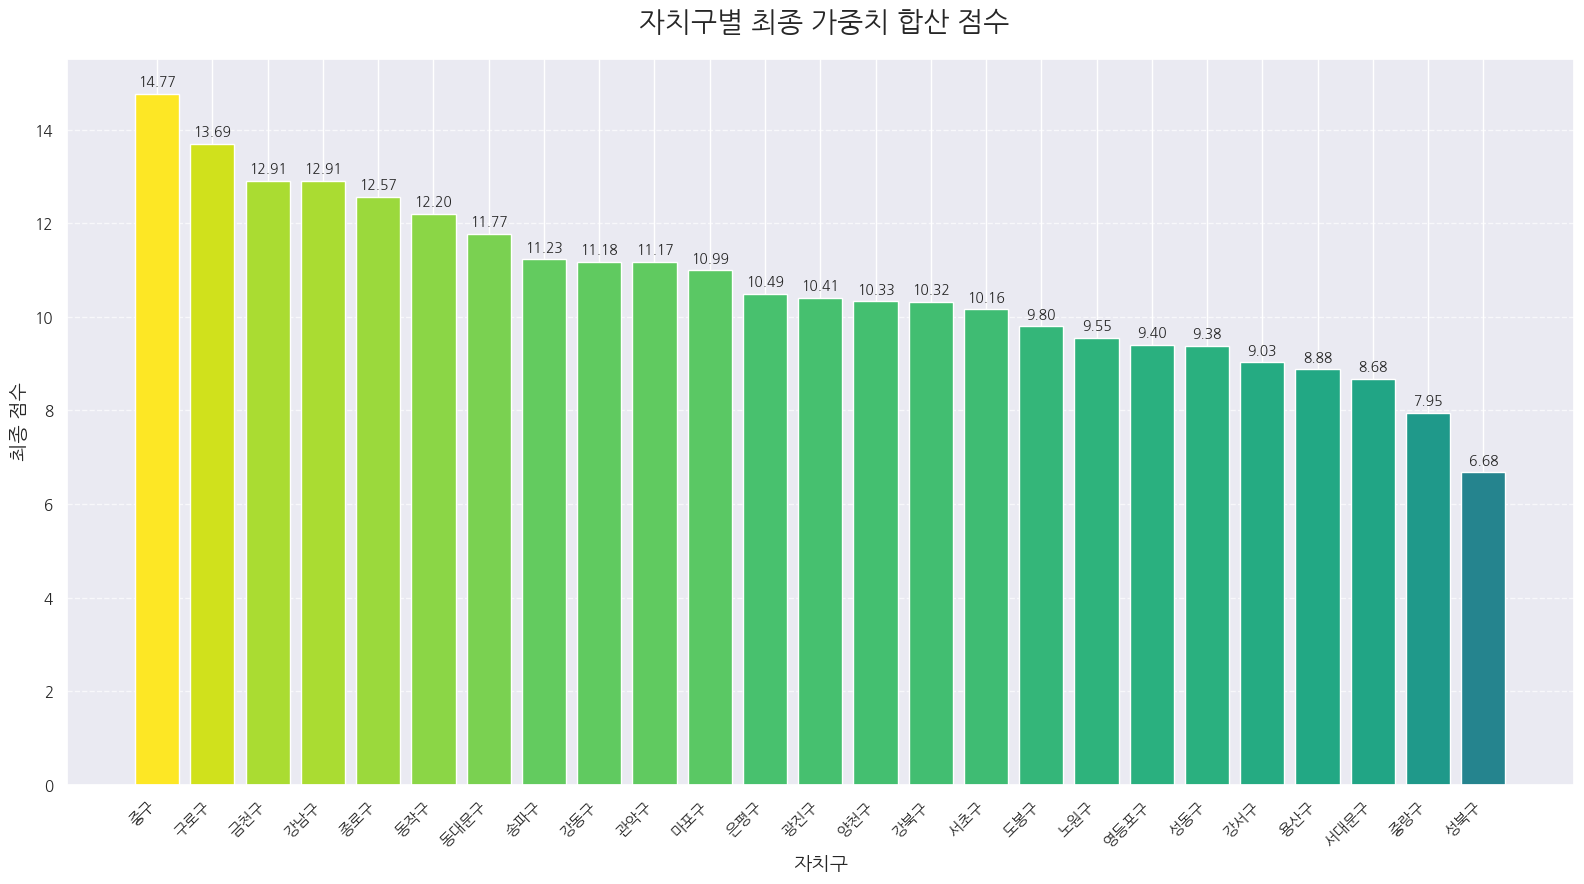

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import platform
import os

df_scores = pd.DataFrame(list(final_scores.items()), columns=['자치구', '최종 점수'])

# 점수 기준으로 내림차순 정렬
df_scores_sorted = df_scores.sort_values(by='최종 점수', ascending=False)

# 시각화
plt.figure(figsize=(16, 9)) # 그래프 크기 설정

# 색상 팔레트 생성 (viridis 컬러맵 사용)
# 점수가 높을수록 밝은 색(노란색 계열), 낮을수록 어두운 색(파란색 계열)
colors = plt.cm.viridis(df_scores_sorted['최종 점수'] / float(max(df_scores_sorted['최종 점수'])))

# 막대 그래프 생성
bars = plt.bar(df_scores_sorted['자치구'], df_scores_sorted['최종 점수'], color=colors)

# 제목 및 레이블
plt.title(' 자치구별 최종 가중치 합산 점수', fontsize=20, pad=20)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('최종 점수', fontsize=14)

# x축 레이블 회전 (가독성 향상)
plt.xticks(rotation=45, ha='right')

# y축 그리드(격자) 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 점수 값(레이블) 표시
for bar in bars:
    yval = bar.get_height()
    # 소수점 2자리까지 표시
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.1, f'{yval:.2f}', va='bottom', ha='center', fontsize=10)

# 레이아웃 조정 (그래프가 잘리지 않도록 함)
plt.tight_layout()
plt.show()

In [ ]:
# 인접한 2개 구의 평균

# 1. 서울시 25개구 인접 지도 데이터 (Adjacency Map)
adj_map = {
    '강남구': ['서초구', '송파구', '성동구'],
    '강동구': ['송파구', '광진구'],
    '강북구': ['성북구', '도봉구'],
    '강서구': ['양천구', '마포구', '영등포구'],
    '관악구': ['서초구', '동작구', '영등포구', '구로구', '금천구'],
    '광진구': ['성동구', '중랑구', '송파구', '강동구'],
    '구로구': ['양천구', '영등포구', '관악구', '금천구'],
    '금천구': ['구로구', '관악구'],
    '노원구': ['도봉구', '성북구', '중랑구'],
    '도봉구': ['강북구', '성북구', '노원구'],
    '동대문구': ['성북구', '중랑구', '성동구', '종로구'],
    '동작구': ['용산구', '서초구', '관악구', '영등포구'],
    '마포구': ['은평구', '서대문구', '중구', '용산구', '영등포구', '강서구'],
    '서대문구': ['은평구', '종로구', '중구', '마포구', '용산구'],
    '서초구': ['강남구', '송파구', '관악구', '동작구', '용산구'],
    '성동구': ['중구', '용산구', '광진구', '동대문구', '중랑구', '강남구'],
    '성북구': ['종로구', '동대문구', '강북구', '도봉구', '노원구', '중랑구'],
    '송파구': ['강남구', '서초구', '광진구', '강동구'],
    '양천구': ['강서구', '구로구', '영등포구'],
    '영등포구': ['양천구', '강서구', '마포구', '용산구', '동작구', '관악구', '구로구'],
    '용산구': ['중구', '성동구', '서초구', '동작구', '영등포구', '마포구', '서대문구'],
    '은평구': ['서대문구', '종로구', '마포구'],
    '종로구': ['은평구', '서대문구', '중구', '성북구', '동대문구'],
    '중구': ['종로구', '서대문구', '마포구', '용산구', '성동구'],
    '중랑구': ['노원구', '성북구', '동대문구', '광진구']
}

# 2. 평균 점수 계산
adjacent_averages = []
processed_pairs = set()  # 중복 계산 방지 (예: '강남-서초'와 '서초-강남')

# final_scores 딕셔너리는 이전 코드 3번에서 이미 계산됨
for district, neighbors in adj_map.items():
    for neighbor in neighbors:
        # (A, B)와 (B, A)를 동일하게 처리하기 위해 정렬
        pair = tuple(sorted((district, neighbor)))

        # 아직 계산하지 않은 인접 쌍이라면
        if pair not in processed_pairs:
            score1 = final_scores.get(pair[0], 0)  # 자치구1의 최종 점수
            score2 = final_scores.get(pair[1], 0)  # 자치구2의 최종 점수
            average = (score1 + score2) / 2

            adjacent_averages.append((pair[0], pair[1], average))
            processed_pairs.add(pair)  # 계산 완료된 쌍으로 등록

# 3. 인접 2개 구 평균 점수 순위 매기기
ranked_averages = sorted(adjacent_averages, key=lambda item: item[2], reverse=True)

# 4. 결과 출력
print("\n" + "--- 🥇 인접 2개 구 평균 점수 최고 지역 (TOP 10) ---")
for i in range(min(10, len(ranked_averages))):  # 상위 10개만 출력
    rank = i + 1
    pair_data = ranked_averages[i]
    print(f"{rank}위: {pair_data[0]} & {pair_data[1]} (평균 점수: {pair_data[2]:.2f})")


--- 🥇 인접 2개 구 평균 점수 최고 지역 (TOP 10) ---
1위: 종로구 & 중구 (평균 점수: 13.67)
2위: 구로구 & 금천구 (평균 점수: 13.30)
3위: 마포구 & 중구 (평균 점수: 12.88)
4위: 관악구 & 구로구 (평균 점수: 12.43)
5위: 동대문구 & 종로구 (평균 점수: 12.17)
6위: 성동구 & 중구 (평균 점수: 12.07)
7위: 강남구 & 송파구 (평균 점수: 12.07)
8위: 관악구 & 금천구 (평균 점수: 12.04)
9위: 구로구 & 양천구 (평균 점수: 12.01)
10위: 용산구 & 중구 (평균 점수: 11.82)


In [ ]:
# 인접 3개 구 (서로 모두 인접) 평균 점수 계산
adj_map = {
    '강남구': ['서초구', '송파구', '성동구'],
    '강동구': ['송파구', '광진구'],
    '강북구': ['성북구', '도봉구'],
    '강서구': ['양천구', '마포구', '영등포구'],
    '관악구': ['서초구', '동작구', '영등포구', '구로구', '금천구'],
    '광진구': ['성동구', '중랑구', '송파구', '강동구'],
    '구로구': ['양천구', '영등포구', '관악구', '금천구'],
    '금천구': ['구로구', '관악구'],
    '노원구': ['도봉구', '성북구', '중랑구'],
    '도봉구': ['강북구', '성북구', '노원구'],
    '동대문구': ['성북구', '중랑구', '성동구', '종로구'],
    '동작구': ['용산구', '서초구', '관악구', '영등포구'],
    '마포구': ['은평구', '서대문구', '중구', '용산구', '영등포구', '강서구'],
    '서대문구': ['은평구', '종로구', '중구', '마포구', '용산구'],
    '서초구': ['강남구', '송파구', '관악구', '동작구', '용산구'],
    '성동구': ['중구', '용산구', '광진구', '동대문구', '중랑구', '강남구'],
    '성북구': ['종로구', '동대문구', '강북구', '도봉구', '노원구', '중랑구'],
    '송파구': ['강남구', '서초구', '광진구', '강동구'],
    '양천구': ['강서구', '구로구', '영등포구'],
    '영등포구': ['양천구', '강서구', '마포구', '용산구', '동작구', '관악구', '구로구'],
    '용산구': ['중구', '성동구', '서초구', '동작구', '영등포구', '마포구', '서대문구'],
    '은평구': ['서대문구', '종로구', '마포구'],
    '종로구': ['은평구', '서대문구', '중구', '성북구', '동대문구'],
    '중구': ['종로구', '서대문구', '마포구', '용산구', '성동구'],
    '중랑구': ['노원구', '성북구', '동대문구', '광진구']
}

# 2. '삼각형' 클러스터 찾기 및 평균 점수 계산
triplet_averages = []
processed_triplets = set()  # 중복 계산 방지 (예: A-B-C, A-C-B...)

# final_scores 딕셔너리는 이전 코드 3번에서 이미 계산됨
all_districts = adj_map.keys()

for dist_A in all_districts:
    neighbors_A = set(adj_map[dist_A])  # A의 이웃들

    for dist_B in neighbors_A:
        # A와 B는 이웃함. B의 이웃을 찾는다.
        neighbors_B = set(adj_map[dist_B])

        # 'A의 이웃'이면서 동시에 'B의 이웃'인 C를 찾는다
        common_neighbors = neighbors_A.intersection(neighbors_B)

        for dist_C in common_neighbors:
            # A, B, C는 '삼각형'을 이룬다.
            # 중복 방지를 위해 정렬된 튜플을 사용
            triplet = tuple(sorted((dist_A, dist_B, dist_C)))

            if triplet not in processed_triplets:
                score1 = final_scores.get(triplet[0], 0)
                score2 = final_scores.get(triplet[1], 0)
                score3 = final_scores.get(triplet[2], 0)
                average = (score1 + score2 + score3) / 3

                triplet_averages.append((triplet[0], triplet[1], triplet[2], average))
                processed_triplets.add(triplet)

# 3. 인접 3개 구 평균 점수 순위 매기기
ranked_triplets = sorted(triplet_averages, key=lambda item: item[3], reverse=True)

# 4. 결과 출력
print("\n" + "--- 🥇 인접 3개 구(순환) 평균 점수 최고 지역 (TOP 10) ---")
for i in range(min(10, len(ranked_triplets))):  # 상위 10개만 출력
    rank = i + 1
    triplet_data = ranked_triplets[i]
    print(f"{rank}위: {triplet_data[0]} & {triplet_data[1]} & {triplet_data[2]} (평균 점수: {triplet_data[3]:.2f})")


--- 🥇 인접 3개 구(순환) 평균 점수 최고 지역 (TOP 10) ---
1위: 관악구 & 구로구 & 금천구 (평균 점수: 12.59)
2위: 서대문구 & 종로구 & 중구 (평균 점수: 12.01)
3위: 마포구 & 용산구 & 중구 (평균 점수: 11.55)
4위: 마포구 & 서대문구 & 중구 (평균 점수: 11.48)
5위: 강남구 & 서초구 & 송파구 (평균 점수: 11.43)
6위: 관악구 & 구로구 & 영등포구 (평균 점수: 11.42)
7위: 관악구 & 동작구 & 서초구 (평균 점수: 11.18)
8위: 구로구 & 양천구 & 영등포구 (평균 점수: 11.14)
9위: 성동구 & 용산구 & 중구 (평균 점수: 11.01)
10위: 강동구 & 광진구 & 송파구 (평균 점수: 10.94)


In [ ]:
import folium

# --- 1. 각 구청의 위도, 경도 정보 ---
locations_data = [
    {
        'name': '관악구청',
        'latlng': [37.4782605, 126.9515208],
        'address': '서울특별시 관악구 관악로 145'
    },
    {
        'name': '구로구청',
        'latlng': [37.4954703, 126.8876391],
        'address': '서울특별시 구로구 가마산로 245'
    },
    {
        'name': '금천구청',
        'latlng': [37.4567667, 126.8954005],
        'address': '서울특별시 금천구 시흥대로73길 70'
    }
]

# --- 2. 지도의 중심점 계산 ---
avg_lat = sum(loc['latlng'][0] for loc in locations_data) / len(locations_data)
avg_lon = sum(loc['latlng'][1] for loc in locations_data) / len(locations_data)
map_center = [avg_lat, avg_lon]

# --- 3. Folium 지도 생성 ---
m = folium.Map(location=map_center, zoom_start=13)

# --- 4. 마커 및 폴리곤 추가 ---
points = []

for loc in locations_data:
    latlng = loc['latlng']
    name = loc['name']
    address = loc['address']

    points.append(latlng)

    # 팝업에 표시할 HTML 내용 (주소도 함께)
    popup_html = f"<b>{name}</b><br>{address}"

    # 지도 위에 글자를 직접 표시하기 위해 마커 위에 텍스트를 오버레이하는 커스텀 HTML 아이콘 사용
    # 이 방법은 텍스트가 항상 보이고, 지도를 확대/축소해도 크기가 유지됩니다.
    html_template = f"""
    <div style="font-weight: bold; font-size: 12px; color: black; text-align: center; white-space: nowrap;">
        <i class="fa fa-bus fa-2x" style="color: blue;"></i><br>
        {name.replace('구청', '')}
    </div>
    """

    # HTML을 포함하는 Folium DivIcon 생성
    bus_icon = folium.features.DivIcon(
        icon_size=(100, 36), # 아이콘의 크기 (글자 길이에 따라 조절)
        icon_anchor=(50, 18), # 아이콘 앵커 (중앙에 오도록)
        html=html_template,
    )

    # 지도에 마커 추가 (버스 아이콘과 구 이름 포함)
    folium.Marker(
        location=latlng,
        popup=folium.Popup(popup_html, max_width=300),
        icon=bus_icon # 커스텀 아이콘 사용
    ).add_to(m)

# 3개 지점을 잇는 '삼각형 클러스터' 폴리곤 추가
folium.Polygon(
    locations=points,
    color='#00008B',      # 진한 파란색 선
    fill=True,
    fill_color='#ADD8E6', # 연한 파란색 채우기
    fill_opacity=0.3,
    tooltip="1위 클러스터 (관악-구로-금천)"
).add_to(m)

# --- 5. (시각화) 파일 저장 대신 지도 객체 'm'을 바로 출력 ---
m